<a href="https://www.kaggle.com/code/kberkek00/car-price-prediction-ipynb?scriptVersionId=284999972" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')

In [4]:
df = df.copy()

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe(include='O')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [9]:
for col in df.columns:
    print(f'\n----------{col}-----------\n')
    print(df[col].value_counts())


----------Car_Name-----------

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

----------Year-----------

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

----------Selling_Price-----------

Selling_Price
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: count, Length: 156, dtype: int64

----------Present_Price-----------

Present_Price
9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
18.54     1

In [10]:
for col in df.columns:
    print(f'\n----------{col}-----------\n')
    print(df[col].unique())


----------Car_Name-----------

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj 

In [11]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [12]:
df[df.duplicated(keep=False)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [13]:
df = df.drop_duplicates()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [15]:
df["Age"] = 2025 - df["Year"]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


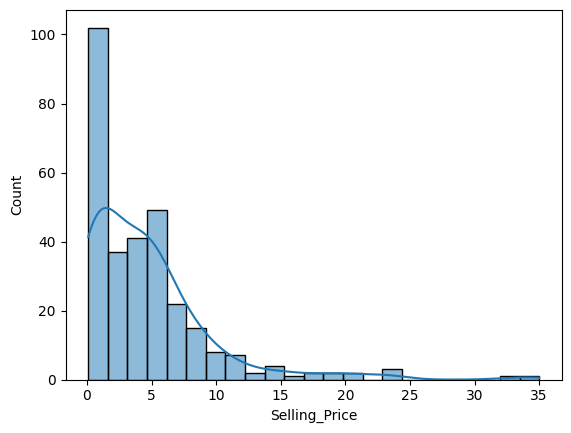

In [16]:
sns.histplot(df["Selling_Price"],kde=True)
plt.show()

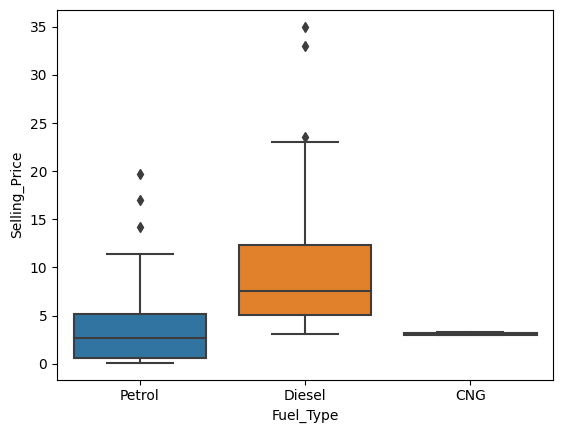

In [17]:
sns.boxplot(x=df["Fuel_Type"],y=df["Selling_Price"])
plt.show()

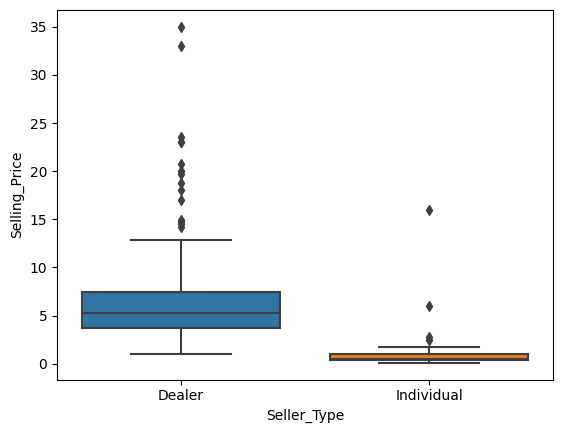

In [18]:
sns.boxplot(x=df["Seller_Type"],y=df["Selling_Price"])
plt.show()

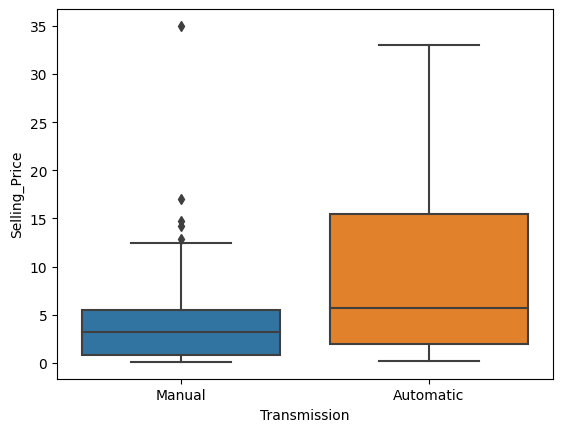

In [19]:
sns.boxplot(x=df["Transmission"],y=df["Selling_Price"])
plt.show()

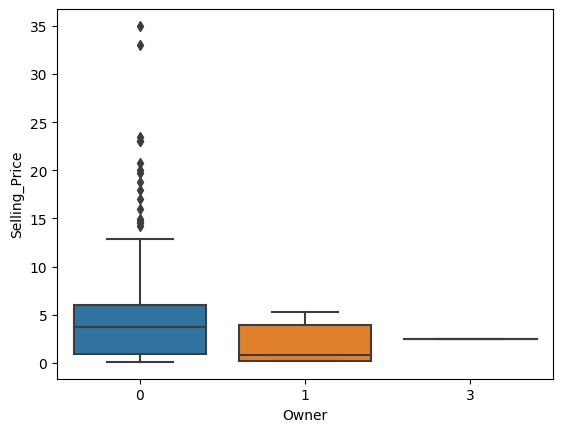

In [20]:
sns.boxplot(x=df["Owner"],y=df["Selling_Price"])
plt.show()

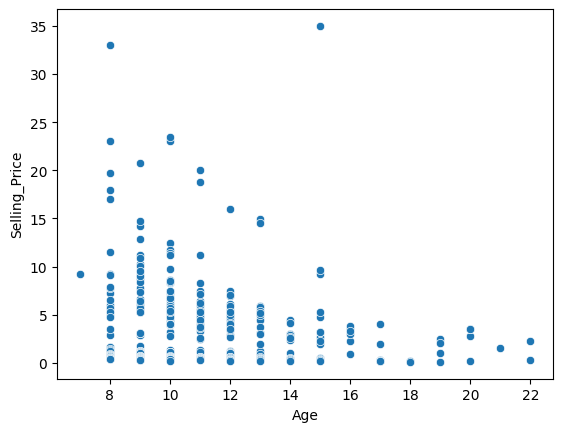

In [21]:
sns.scatterplot(x=df["Age"],y=df["Selling_Price"])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


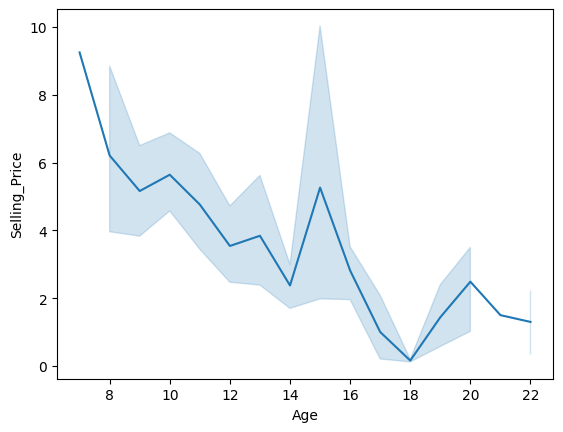

In [22]:
sns.lineplot(x=df["Age"],y=df["Selling_Price"])
plt.show()

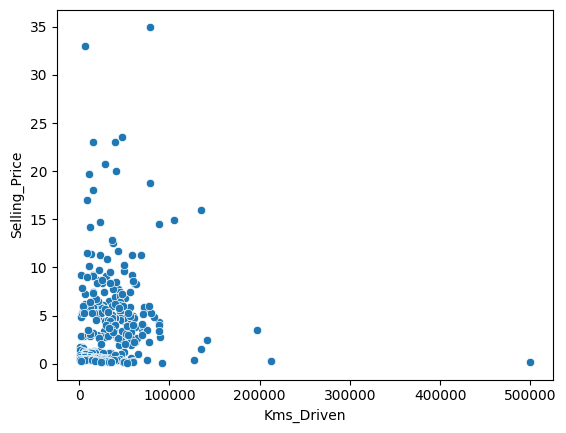

In [23]:
sns.scatterplot(x=df["Kms_Driven"],y=df["Selling_Price"])
plt.show()

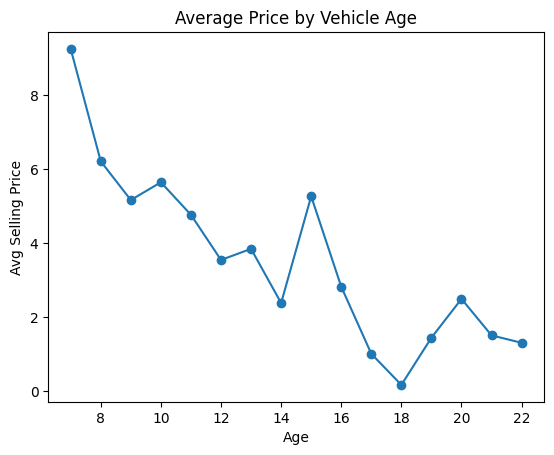

In [24]:
plt.figure()
df.groupby('Age')['Selling_Price'].mean().plot(kind='line', marker='o')
plt.title("Average Price by Vehicle Age")
plt.xlabel("Age")
plt.ylabel("Avg Selling Price")
plt.show()

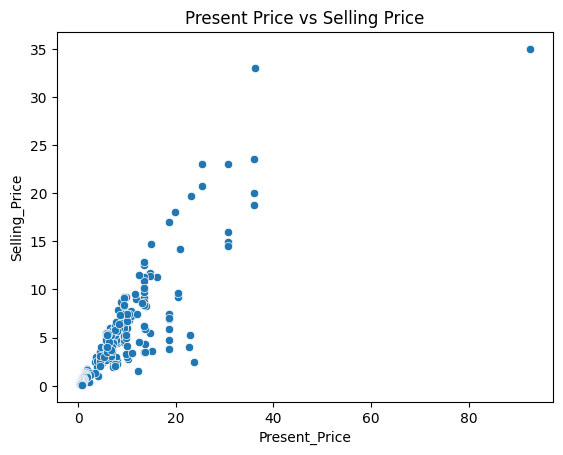

In [25]:
plt.figure()
sns.scatterplot(x=df['Present_Price'], y=df['Selling_Price'])
plt.title("Present Price vs Selling Price")
plt.show()

In [26]:
df['Kms_Log'] = np.log1p(df['Kms_Driven'])

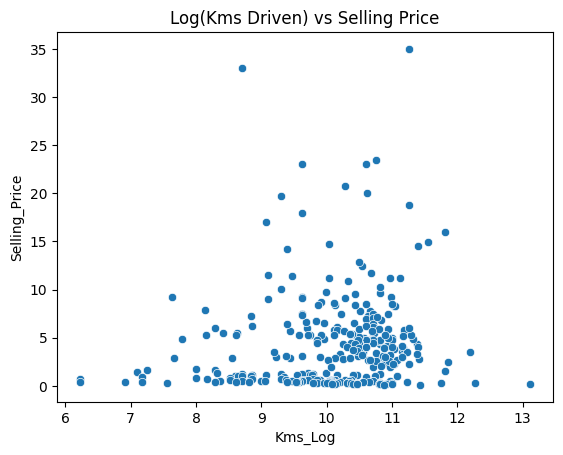

In [27]:
plt.figure()
sns.scatterplot(x=df['Kms_Log'], y=df['Selling_Price'])
plt.title("Log(Kms Driven) vs Selling Price")
plt.show()

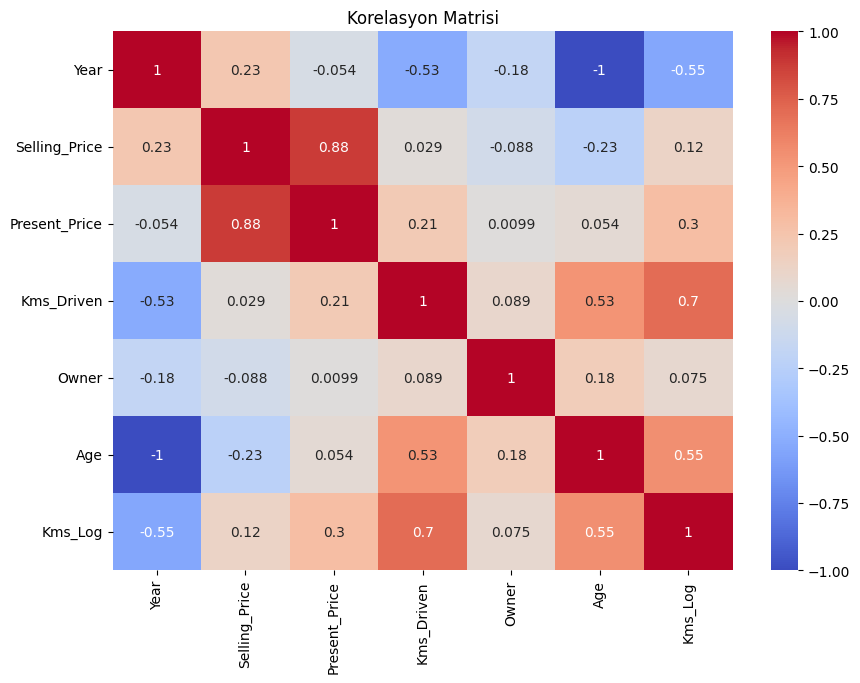

In [28]:
plt.figure(figsize=(10,7))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

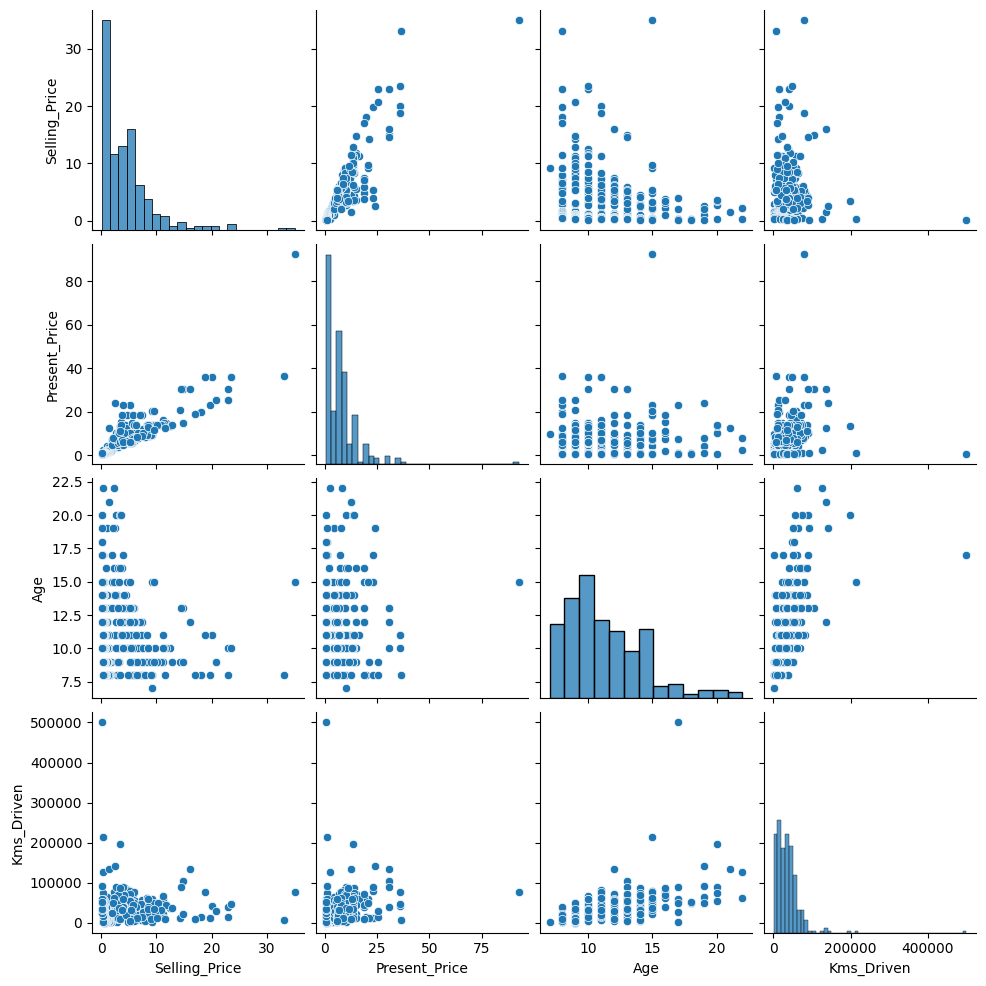

In [29]:
sns.pairplot(df[['Selling_Price','Present_Price','Age','Kms_Driven']])
plt.show()

In [30]:
X = df.drop(['Selling_Price','Car_Name','Year','Kms_Driven'],axis=1)
y = df["Selling_Price"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,PolynomialFeatures

In [34]:
numerical_features = ["Present_Price","Owner","Age","Kms_Log"]
categorical_features = ["Fuel_Type","Seller_Type","Transmission"]

In [35]:
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler' ,StandardScaler() )
])

In [36]:
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(handle_unknown='ignore', drop='first'))
])

In [37]:
preprocesser = ColumnTransformer(
    transformers=[
        ("num",numeric_transformer,numerical_features),
        ("cat",categorical_transformer,categorical_features)
    ]
)

In [38]:
lin_reg_model = Pipeline(steps=[
    ("preprocess",preprocesser),
    ("lin_reg_regressor",LinearRegression())
])

In [39]:
lin_reg_model.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Present_Price', 'Owner',
                                                   'Age', 'Kms_Log']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])])),
                ('lin_reg_regressor', LinearRegression())])

In [40]:
y_pred = lin_reg_model.predict(X_test)

In [41]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [42]:
print(f"R2 Score : {r2_score(y_test,y_pred)}")
print(f"Mae : {mean_absolute_error(y_test,y_pred)}")
print(f"Mse : {mean_squared_error(y_test,y_pred)}")

R2 Score : 0.8820477050200304
Mae : 1.178688358007576
Mse : 2.523279136560652


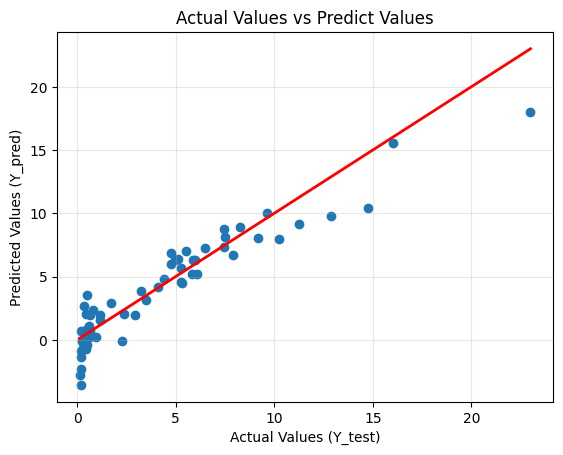

In [43]:
plt.scatter(y_test,y_pred)
plt.plot(
    [y_test.min(),y_test.max()],
    [y_test.min(),y_test.max()],
    color = "r",
    linewidth=2
)

plt.title("Actual Values vs Predict Values")
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Predicted Values (Y_pred)")
plt.grid(True, alpha=0.3)
plt.show()

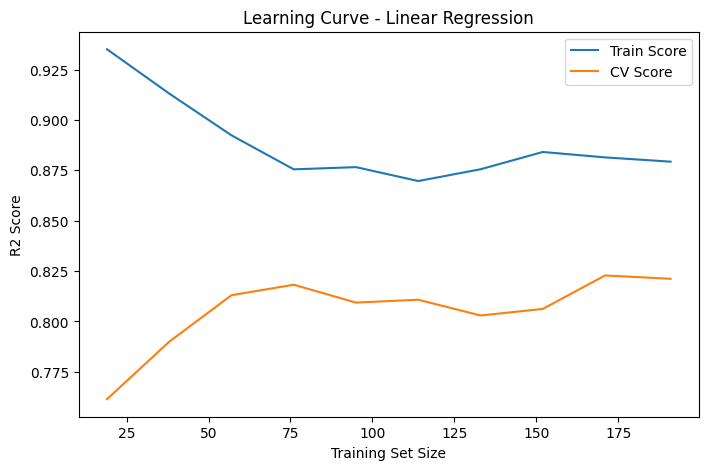

In [44]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    lin_reg_model,
    X_train,
    y_train,
    cv=5,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, label="Train Score")
plt.plot(train_sizes, test_mean, label="CV Score")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.title("Learning Curve - Linear Regression")
plt.legend()
plt.show()

In [45]:
from sklearn.linear_model import Ridge
ridge_model = Pipeline(steps=[
    ("preprocess",preprocesser),
    ("ridge_regressor",Ridge())
])

In [46]:
ridge_model.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Present_Price', 'Owner',
                                                   'Age', 'Kms_Log']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])])),
                ('ridge_regressor', Ridge())])

In [47]:
y_pred = ridge_model.predict(X_test)

In [48]:
print(f"R2 Score : {r2_score(y_test,y_pred)}")
print(f"Mae : {mean_absolute_error(y_test,y_pred)}")
print(f"Mse : {mean_squared_error(y_test,y_pred)}")

R2 Score : 0.8820354679034252
Mae : 1.1761468199537668
Mse : 2.5235409174868044


In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid_knn = {
    "knn_regressor__n_neighbors": [3, 5, 7, 9, 11, 15, 21],
    "knn_regressor__weights": ["uniform", "distance"],
    "knn_regressor__p": [1, 2], 
    "knn_regressor__metric": ["minkowski"]
}

In [51]:
knn_model = Pipeline(steps=[
    ("preprocess",preprocesser),
    ("knn_regressor",KNeighborsRegressor())
])

In [52]:
grid_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring="r2", n_jobs=-1)

In [53]:
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Present_Price',
                                                                          'Owner',
                                                                          'Age',
                                                                          'Kms_Log']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Fuel_Type',
                                                                          'Seller_Type',
                                                                          'Transmission'])])),
                                       ('knn_regressor',
                                        KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn_regressor__metric': ['minkowski'],
                         'knn_regressor__n_neighbors': [3, 5, 7, 9, 11, 15, 21],
                         'knn_regressor__p': [1, 2],
                         'knn_regressor__weights': ['uniform', 'distance']},
             scoring='r2')

In [54]:
y_pred_knn = grid_knn.predict(X_test)

In [55]:
grid_knn.best_score_

0.8952966076637727

In [56]:
grid_knn.best_params_

{'knn_regressor__metric': 'minkowski',
 'knn_regressor__n_neighbors': 5,
 'knn_regressor__p': 2,
 'knn_regressor__weights': 'distance'}

In [57]:
grid_knn.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Present_Price', 'Owner',
                                                   'Age', 'Kms_Log']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])])),
                ('knn_regressor', KNeighborsRegressor(weights='distance'))])

In [58]:
print(f"R2 Score : {r2_score(y_test,y_pred_knn)}")
print(f"Mae : {mean_absolute_error(y_test,y_pred_knn)}")
print(f"Mse : {mean_squared_error(y_test,y_pred_knn)}")

R2 Score : 0.9315118431730192
Mae : 0.8074413062839708
Mse : 1.4651239914608007


In [59]:
dt_model = Pipeline(steps=[
    ("preprocess",preprocesser),
    ("dt_regressor",DecisionTreeRegressor(random_state=42))
])

In [60]:
param_grid_dt = {
    "dt_regressor__criterion": ["squared_error", "friedman_mse", "absolute_error"],
    "dt_regressor__max_depth": [None, 5, 10, 15, 20],
    "dt_regressor__min_samples_split": [2, 5, 10],
    "dt_regressor__min_samples_leaf": [1, 2, 4],
    "dt_regressor__max_features": [None, "sqrt", "log2"]
}

In [61]:
grid_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=1
)

In [62]:
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Present_Price',
                                                                          'Owner',
                                                                          'Age',
                                                                          'Kms_Log']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle...
                                       ('dt_regressor',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt_regressor__criterion': ['squared_error',
                                                     'friedman_mse',
                                                     'absolute_error'],
                         'dt_regressor__max_depth': [None, 5, 10, 15, 20],
                         'dt_regressor__max_features': [None, 'sqrt', 'log2'],
                         'dt_regressor__min_samples_leaf': [1, 2, 4],
                         'dt_regressor__min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=1)

In [63]:
grid_dt.best_params_

{'dt_regressor__criterion': 'friedman_mse',
 'dt_regressor__max_depth': None,
 'dt_regressor__max_features': None,
 'dt_regressor__min_samples_leaf': 1,
 'dt_regressor__min_samples_split': 2}

In [64]:
y_pred = grid_dt.predict(X_test)

In [65]:
print("R2 :", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 : 0.9653049973736743
MAE: 0.5058333333333332
MSE: 0.7422083333333334


In [66]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Model": name,
        "R2 Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred)
    }

In [67]:
results = []

results.append(evaluate_model("Linear Regression", lin_reg_model, X_test, y_test))
results.append(evaluate_model("Ridge", ridge_model, X_test, y_test))
results.append(evaluate_model("KNN", grid_knn, X_test, y_test))
results.append(evaluate_model("Decision Tree", grid_dt, X_test, y_test))

In [68]:
df_results = pd.DataFrame(results)
df_results

,Model,R2 Score,MAE,MSE
0,Linear Regression,0.882048,1.178688,2.523279
1,Ridge,0.882035,1.176147,2.523541
2,KNN,0.931512,0.807441,1.465124
3,Decision Tree,0.965305,0.505833,0.742208
